In [7]:
import pandas as pd
from io import StringIO
csv = StringIO("""size,bedrooms,price
650, 1, 120000
800,2, 155000
900,2, 180000
1200,3,240000
1500,3,310000
1800,4,360000
""")
df = pd.read_csv(csv)
df.head()

,size,bedrooms,price
0,650,1,120000
1,800,2,155000
2,900,2,180000
3,1200,3,240000
4,1500,3,310000


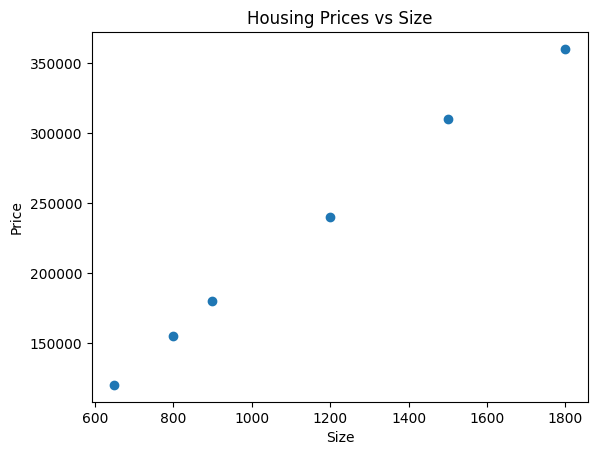

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df["size"], df["price"])
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Housing Prices vs Size")
plt.show()



# 1- Normal Equation

In [32]:
import numpy as np
x = np.array(df["size"]).reshape(-1,1)
y = np.array(df["price"]).reshape(-1,1)

X = np.hstack((np.ones((x.shape[0],1)), x))
print(X)

[[1.0e+00 6.5e+02]
 [1.0e+00 8.0e+02]
 [1.0e+00 9.0e+02]
 [1.0e+00 1.2e+03]
 [1.0e+00 1.5e+03]
 [1.0e+00 1.8e+03]]


In [34]:
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
w = XtX_inv @ X.T @ y
w0, w1 = float(w[0]), float(w[1])
print(f"Slope={w1}, Intercept={w0}")

Slope=210.3945693678403, Intercept=-12700.466694951116


/tmp/ipython-input-2713411421.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w0, w1 = float(w[0]), float(w[1])


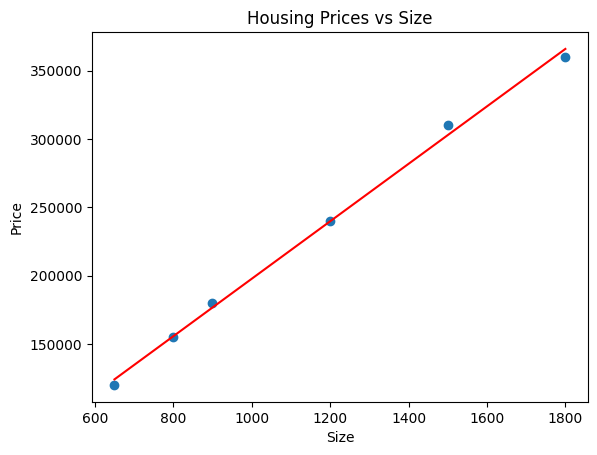

In [35]:
y_hat = w0 + w1 * x
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Housing Prices vs Size")
plt.show()

# Train/Test Split

In [47]:
train = df. iloc [: -2]
test = df. iloc [ -2:]

Xtr = np.hstack([np.ones((len(train),1)),train["size"].to_numpy().reshape(-1 ,1)])
ytr = train["price"].to_numpy().reshape(-1 ,1)

Xte = np.hstack([np.ones((len(test),1)),test ["size"].to_numpy().reshape(-1 ,1)])
yte = test ["price"].to_numpy().reshape( -1 ,1)

# fit on train
w = np.linalg.inv(Xtr.T @ Xtr) @ (Xtr.T @ ytr)

# predict on test
yhat_te = Xte @ w
print(yhat_te)

[[306891.89189189]
 [372104.24710425]]


# 2- GD

In [58]:
X = np. hstack ([np.ones ((len(df) ,1)),df["size"].to_numpy().reshape(-1 ,1)])
y = df["price"].to_numpy().reshape(-1 ,1)
w_gd = np.zeros((2 ,1)) # init
alpha = 1e-7 # learning rate ( tiny units :dollars )
for step in range(20000):
  y_hat = X @ w_gd
  grad = (2/ len (X)) * (X.T @ (y_hat - y))
  w_gd -= alpha * grad
  print (w_gd.ravel())

w_gd0, w_gd1 = float(w_gd[0]), float(w_gd[1])
print(f"Slope={w_gd1}, Intercept={w_gd0}")

Streaming output truncated to the last 5000 lines.
[ -4.09479266 200.51440417]
[ -4.09507597 200.51440439]
[ -4.09535927 200.51440461]
[ -4.09564257 200.51440483]
[ -4.09592588 200.51440505]
[ -4.09620918 200.51440527]
[ -4.09649248 200.51440549]
[ -4.09677579 200.51440571]
[ -4.09705909 200.51440593]
[ -4.09734239 200.51440616]
[ -4.09762569 200.51440638]
[ -4.097909  200.5144066]
[ -4.0981923  200.51440682]
[ -4.0984756  200.51440704]
[ -4.09875891 200.51440726]
[ -4.09904221 200.51440748]
[ -4.09932551 200.5144077 ]
[ -4.09960882 200.51440792]
[ -4.09989212 200.51440814]
[ -4.10017542 200.51440836]
[ -4.10045873 200.51440858]
[ -4.10074203 200.5144088 ]
[ -4.10102533 200.51440902]
[ -4.10130864 200.51440924]
[ -4.10159194 200.51440946]
[ -4.10187524 200.51440968]
[ -4.10215855 200.5144099 ]
[ -4.10244185 200.51441012]
[ -4.10272515 200.51441034]
[ -4.10300846 200.51441056]
[ -4.10329176 200.51441078]
[ -4.10357506 200.51441101]
[ -4.10385837 200.51441123]
[ -4.10414167 200.51441145]

/tmp/ipython-input-2417294083.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_gd0, w_gd1 = float(w_gd[0]), float(w_gd[1])


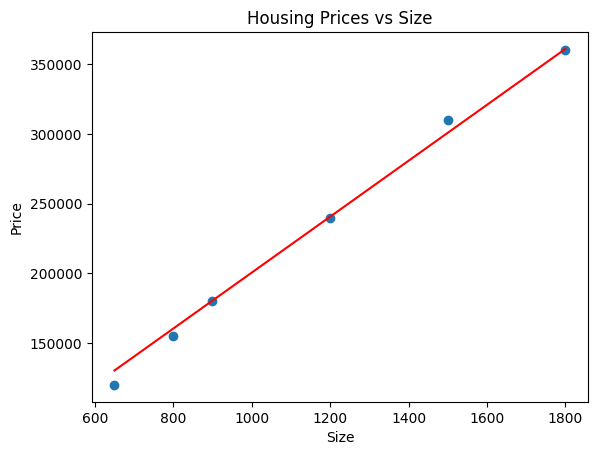

In [54]:
y_hat = w_gd0 + w_gd1 * x
plt.scatter(x, y)
plt.plot(x, y_hat, color="red")
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Housing Prices vs Size")
plt.show()